In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# os.chdir('drive/My Drive/Datasets/')
# os.listdir()
# dataset = pd.read_csv()

In [7]:
dataset = pd.read_csv('auto.csv')

In [8]:
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
#DATA CLEANING

#Replace nilai ? dengan None

dataset.replace("?", np.nan, inplace=True) #inplace untuk apakah kita langsung ingin mengganti nilai tersebut

In [11]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
dataset.isnull().sum().sort_values() #untuk mengatahui apakah ada nilai Null dan di urutkan agar memudahkan

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [13]:
avg_norm_loss = dataset['normalized-losses'].astype('float').mean(axis=0)
avg_bore = dataset['bore'].astype('float').mean(axis=0)
avg_stroke = dataset['stroke'].astype('float').mean(axis=0)
avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)
avg_peak_rpm = dataset['peak-rpm'].astype('float').mean(axis=0)

# avg_norm_loss
# avg_bore
# avg_stroke
# avg_horsepower
# avg_peak_rpm

In [14]:
dataset['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)
dataset['bore'].replace(np.nan, avg_bore, inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke, inplace=True)
dataset['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
dataset['num-of-doors'].replace(np.nan, "four", inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [17]:
dataset.dropna(subset=["price"], axis=0, inplace=True)
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [19]:
dataset[["bore", "stroke", "price", "peak-rpm"]] = dataset[["bore", "stroke", "price", "peak-rpm"]].astype("float")
dataset[["horsepower", "normalized-losses"]] = dataset[["horsepower", "normalized-losses"]].astype("float")

In [20]:
dataset.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facbb0cad68>,
      dtype=object)

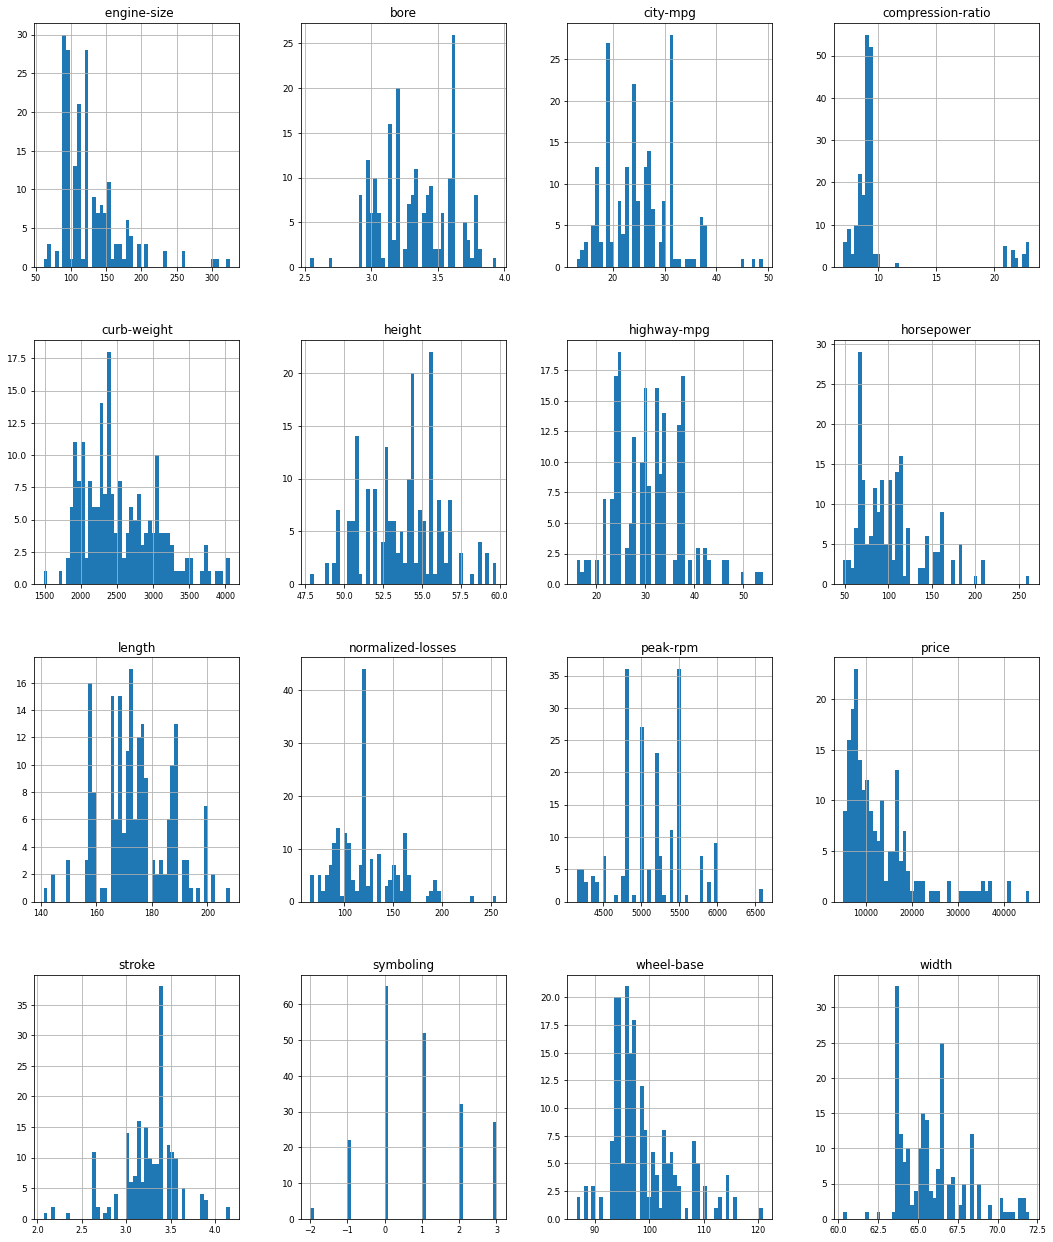

In [21]:
dataset_numbers = dataset.select_dtypes(include=['float64', 'int64'])

dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=9)

In [22]:
#FEATURE ENGINEERING

dataset['city-L/100km'] = 235 / dataset['city-mpg']
dataset['highway-L/100km'] = 235 / dataset['highway-mpg']

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


In [23]:
#BINNING

dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [24]:
print(min(dataset['horsepower']), max(dataset['horsepower']))

48.0 262.0


In [25]:
bins = np.linspace(min(dataset['horsepower']), max(dataset['horsepower']), 4)

print(bins)

[ 48.         119.33333333 190.66666667 262.        ]


In [26]:
group_names = ['horsepower-low', 'horsepower-medium', 'horsepower-high']
dataset['horsepower-categories'] = pd.cut(dataset['horsepower'], bins, labels=group_names, include_lowest=True)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low


In [27]:
#ONE-HOT ENCODING

dataset['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [28]:
fuel_categorized = pd.get_dummies(dataset['fuel-type'])
fuel_categorized

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [29]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low


In [30]:
dataset = pd.concat([dataset, fuel_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1


In [31]:
make_categorized = pd.get_dummies(dataset['make'])
make_categorized

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
dataset = pd.concat([dataset, make_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
cleanup_nums = {
    'num-of-doors':{
        'four': 4,
        'two' : 2
    },
    'num-of-cylinders': {
        'four' : 4,
        'six' :6,
        'five' : 5,
        'eight' : 8,
        'two' : 2,
        'twelve' : 12,
        'three' : 3

    }
}

dataset.replace(cleanup_nums, inplace=True)

In [34]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
dataset.drop(['make', 'city-mpg', 'highway-mpg'], axis=1, inplace=True)

dataset.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122.0,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
dataset.dtypes


symboling                   int64
normalized-losses         float64
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                float64
peak-rpm                  float64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categories    category
diesel                      uint8
gas                         uint8
alfa-romero                 uint8
audi          

In [37]:
# dataset['fuel-system'].value_counts()
dataset['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [38]:
aspiration_categorized = pd.get_dummies(dataset['aspiration'])
aspiration_categorized

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [39]:
dataset = pd.concat([dataset, aspiration_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo
0,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,122.0,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,164.0,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164.0,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
dataset.dtypes

symboling                   int64
normalized-losses         float64
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                float64
peak-rpm                  float64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categories    category
diesel                      uint8
gas                         uint8
alfa-romero                 uint8
audi          

In [41]:
dataset['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [42]:
bodystyle_categorized = pd.get_dummies(dataset['body-style'])
bodystyle_categorized

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [43]:
dataset = pd.concat([dataset, bodystyle_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon
0,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,3,122.0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,122.0,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2,164.0,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,164.0,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [44]:
dataset.dtypes

symboling                   int64
normalized-losses         float64
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                float64
peak-rpm                  float64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categories    category
diesel                      uint8
gas                         uint8
alfa-romero                 uint8
audi          

In [50]:
# dataset.drop(['aspiration', 'body-style', 'fuel-type', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis=1, inplace=True)
# dataset.drop(['fuel-type', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis=1, inplace=True)
# dataset.drop(['horsepower-categories'], axis=1, inplace=True)

dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,std,turbo,convertible,hardtop,hatchback,sedan,wagon
0,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,8.703704,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,3,122.0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,122.0,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [46]:
# dataset['fuel-type'].value_counts()

In [51]:
feature = dataset.drop(['price'], axis=1)
label = dataset['price']

In [52]:
scaler = StandardScaler()

feature_scaled = scaler.fit_transform(feature.values) 
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

In [53]:
def preproces(type_of_transform):
  scaler = type_of_transform

  feature_scaled = scaler.fit_transform(feature.values) 
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)
  
  lin_reg = LinearRegression()
  lin_reg.fit(feature_train, label_train)

  predictions = lin_reg.predict(feature_test)

  print("\nprediksi menggunakan ", type_of_transform)
  # print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
  print("r2 score")
  print(r2_score(label_test, predictions))
  print("RMSE")
  print(np.sqrt(mean_squared_error(label_test, predictions)))
  

In [54]:
preproces(StandardScaler())


prediksi menggunakan  StandardScaler(copy=True, with_mean=True, with_std=True)
r2 score
0.8363985315121084
RMSE
2635.6261008259503


In [55]:
preproces(PowerTransformer())


prediksi menggunakan  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
r2 score
0.7819435097178891
RMSE
3042.809123603129


In [56]:
preproces(QuantileTransformer())


prediksi menggunakan  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
r2 score
0.8164872655658795
RMSE
2791.4079059928267


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [57]:
preproces(MinMaxScaler())


prediksi menggunakan  MinMaxScaler(copy=True, feature_range=(0, 1))
r2 score
0.836310669602664
RMSE
2636.333735241024


In [58]:
preproces(MaxAbsScaler())


prediksi menggunakan  MaxAbsScaler(copy=True)
r2 score
0.8363106696026642
RMSE
2636.3337352410226


In [59]:
preproces(RobustScaler())


prediksi menggunakan  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)
r2 score
0.8363106696026592
RMSE
2636.333735241063


In [60]:
preproces(power_transform(feature,method='box-cox'))

ValueError: ignored

Untuk hasil dari beberapa metode transformasi nilai akurasi nya hampir sama semua untuk metode **StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler()** yaitu **0.8363**, nilai akurasi **QuantileTransformer()** sedikit lebih rendah yaitu **0.8164**.sedangkan untuk metode **yeo-johnson** nilai akurasi nya paling rendah yaitu **0.7819**.
Untuk Metode **Box Cox Transformation** masih mengalami error karena metode ini hanya bisa digunakan pada data yang positif sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. .

In [72]:
#Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=400, bootstrap=False, max_features = "sqrt",max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, random_state=10)
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9998922727401991
RMSE
86.60254037844386

prediksi menggunakan testing set
r2 score
0.9267291733745039
RMSE
1763.826026153277


In [68]:
#XGBoost
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.02, n_estimators=400, verbosity=1, objective='reg:squarederror', booster='gbtree',)
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9910717450190702
RMSE
788.4081726334966

prediksi menggunakan testing set
r2 score
0.9324259783138031
RMSE
1693.8700314055263


In [73]:
#SVM Regressor
svm_reg = SVR(kernel='linear', C=200.0)
svm_reg.fit(feature_train, label_train)

predictions = svm_reg.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = svm_reg.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9412957309816891
RMSE
2021.6346260640953

prediksi menggunakan testing set
r2 score
0.8760024151204197
RMSE
2294.5462404886293


In [75]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=1, leaf_size=10, p=2, n_jobs=None, algorithm='brute')
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_train, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_train, predictions)))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
# print('Akurasi dari Testing Set: {:.3f}'.format(lin_reg.score(feature_test, label_test))) # .score() -> Accuracy
print("r2 score")
print(r2_score(label_test, predictions))
print("RMSE")
print(np.sqrt(mean_squared_error(label_test, predictions)))

prediksi menggunakan training set
r2 score
0.9997845454803982
RMSE
122.47448713915891

prediksi menggunakan testing set
r2 score
0.893537360539371
RMSE
2126.1251046879424
